In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from time import time
#sp.show_version()

# praktiskt om man vill kunna se alla kolumner och rader i en dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

#df_state_init.loc[1]

# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 


forcing_2017 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2017_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

forcing_2018 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2018_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

#sp.load_forcing_grid sätter Datetime som index på forcing data, samst läser in all forcing data!

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

#sp.check för kolla så att forcing funkar
sp.check_forcing(df_forcing)
#df_forcing

2021-03-05 11:18:34,872 - SuPy - INFO - All cache cleared.
2021-03-05 11:18:38,426 - SuPy - INFO - All cache cleared.
2021-03-05 11:18:43,991 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-03-05 11:18:52,674 - SuPy - INFO - All checks for `df_forcing` passed!


In [2]:
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

2021-03-05 11:18:52,751 - SuPy - INFO - ====================
2021-03-05 11:18:52,773 - SuPy - INFO - Simulation period:
2021-03-05 11:18:52,824 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-03-05 11:18:52,854 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-03-05 11:18:52,870 - SuPy - INFO - 
2021-03-05 11:18:52,883 - SuPy - INFO - No. of grids: 4
2021-03-05 11:18:52,889 - SuPy - INFO - SuPy is running in parallel mode
2021-03-05 11:22:17,164 - SuPy - INFO - Execution time: 204.4 s
2021-03-05 11:22:17,254 - SuPy - INFO - ====================



In [3]:
#df_output.columns.levels[0]

In [4]:
#df_output.head()

In [5]:
df_output_base = df_output.SUEWS.loc[1]

df_output_a = df_output.SUEWS.loc[2]

df_output_b = df_output.SUEWS.loc[3]

df_output_c = df_output.SUEWS.loc[4] 

df_output_merge_x=pd.concat([df_output_base, df_output_a, df_output_b, df_output_c],axis=1,join='inner',keys=['base','a', 'b', 'c']).swaplevel(0,1,axis=1).sort_index(axis=1)

In [6]:
df_state_init.filter(like="pipe")

var     pipecapacity
ind_dim            0
grid                
1              100.0
2               65.0
3               65.0
4               65.0

In [7]:
df_output_merge_x.loc['2018 01','QE']

a          b      base          c
datetime                                                      
2018-01-01 00:00:00   9.684997   9.684997  4.429512   9.684997
2018-01-01 00:05:00   9.591822   9.591822  4.349498   9.591822
2018-01-01 00:10:00   9.500486   9.500486  4.269532   9.500486
2018-01-01 00:15:00   9.410903   9.410903  4.189519   9.410903
2018-01-01 00:20:00   9.323028   9.323028  4.108844   9.323028
...                        ...        ...       ...        ...
2018-01-31 23:35:00  11.307809  11.307809  7.726191  11.307809
2018-01-31 23:40:00  11.208855  11.208855  7.668077  11.208855
2018-01-31 23:45:00  11.112088  11.112088  7.611096  11.112088
2018-01-31 23:50:00  11.017444  11.017444  7.555194  11.017444
2018-01-31 23:55:00  10.908756  10.908756  7.479178  10.908756

[8928 rows x 4 columns]

In [9]:
from datetime import date,datetime

def supy_plot(var, df_in, s,e, size=False):

    if size:   
        size=size
    else:
        size = 10, 6

    fig, axes = plt.subplots(2, 1, sharex=True)
    a = df_in.loc[s:e,[var]]\
        .plot(ax=axes[0],figsize=(size),title=var)

    #f_date = (date(int(s[0:4]),int(s[5:7]),int(s[7:10])))
    #l_date = (date(int(e[0:4]),int(e[5:7]),int(e[7:10])))
    #f_date - datetime.timedelta(days=2)    
    #l_date + datetime.timedelta(days=2)
    
    #plt.hlines(0,f_date - datetime.timedelta(days=2),l_date + datetime.timedelta(days=2),\
        #linestyles='--',colors='grey')
        # byt till dina variabelnamn
    a.legend(['base','a', 'b', 'c'])

    b = df_diff_m=pd.concat([df_in.loc[s:e,(var,'a')]-df_in.loc[s:e,(var,'base')],\
        df_in.loc[s:e,(var,'b')]-df_in.loc[s:e,(var,'base')],\
        df_in.loc[s:e,(var,'c')]-df_in.loc[s:e,(var,'base')],\
        ],\
        axis=1,join='inner',keys=['base', 'a', 'b', 'c']).sort_index(axis=1).\
        plot(ax=axes[1], figsize=(size), title = ('Difference '))

    b.legend(['a', 'b', 'c'])

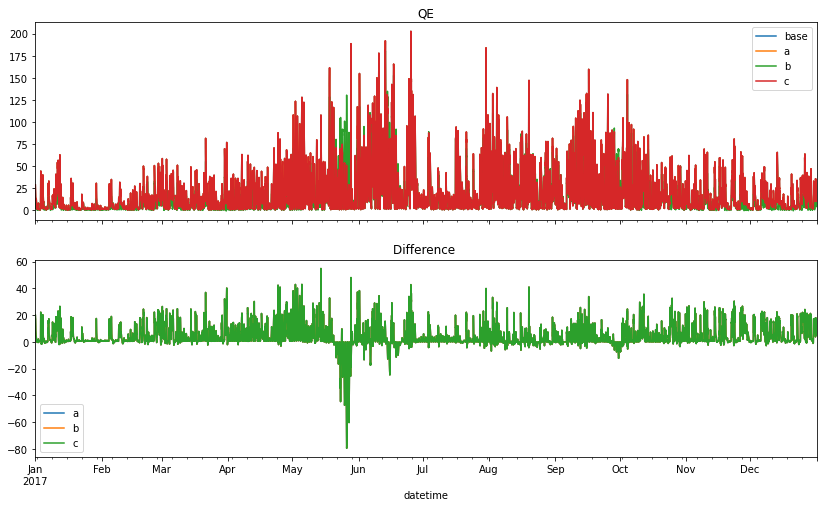

In [10]:
#plot för att jämföra olika scenarion. Base är kville (grid 1), a är kvilleförändrad (grid 2), b grid 3 och c grid 4
s = '2017'
e = '2017'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))
#plottar nedar intressanta tidsperioder baserat på denna plot, ex. maj, juni och sept/okt

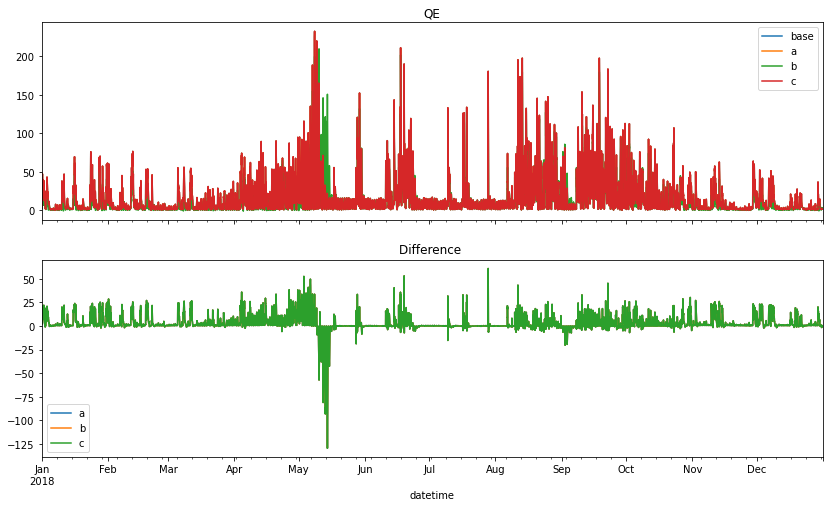

In [11]:
#plot för att jämföra olika scenarion. Base är kville (grid 1), a är kvilleförändrad (grid 2), b grid 3 och c grid 4
s = '2018'
e = '2018'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))
#plottar nedar intressanta tidsperioder baserat på denna plot, ex. april/maj, aug och sept

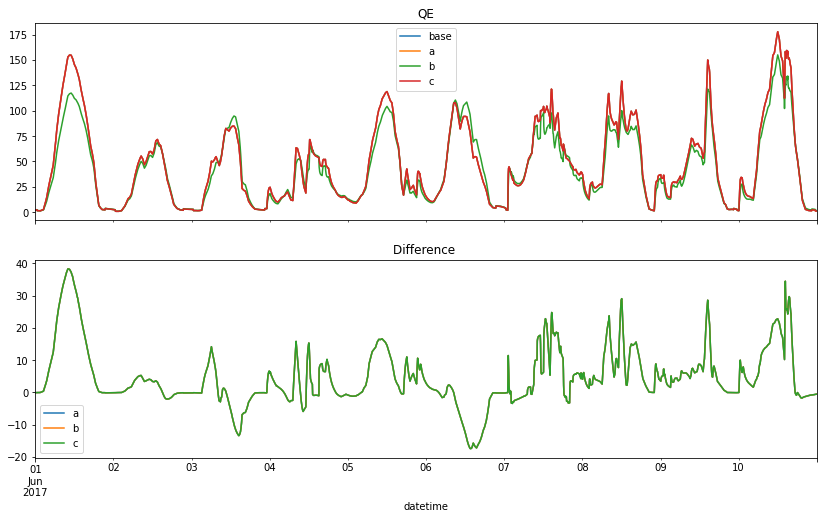

In [12]:
#plot för att jämföra olika scenarion. Base är kville (grid 1), a är kvilleförändrad (grid 2), b grid 3 och c grid 4
# kraftig nederbörd mitt på dagen 4/6 och sedan
s = '2017 06 01'
e = '2017 06 10'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))

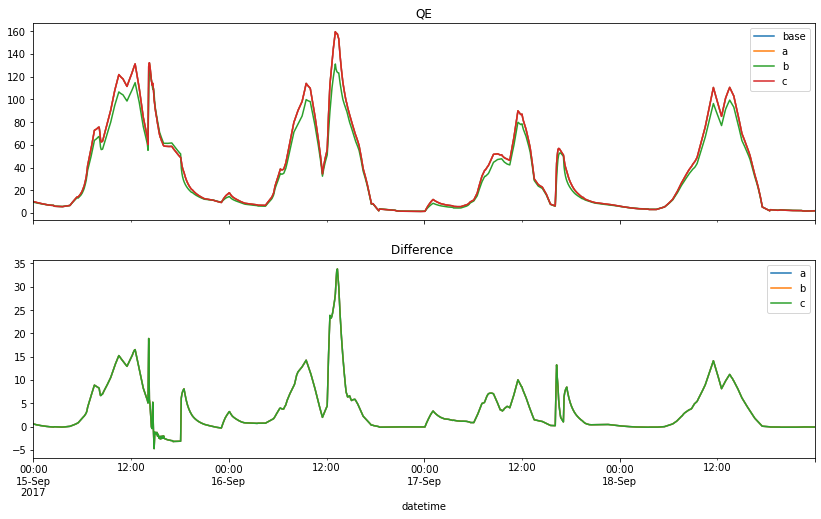

In [13]:
s = '2017 09 15'
e = '2017 09 18'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))

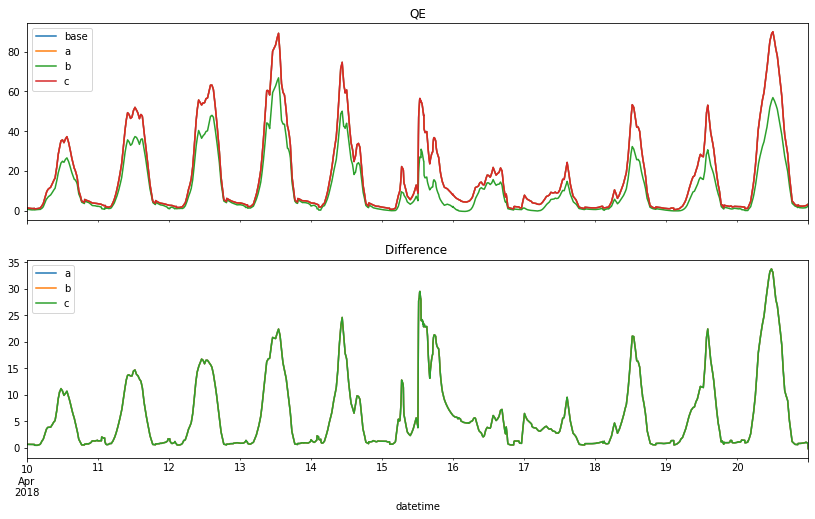

In [14]:
s = '2018 04 10'
e = '2018 04 20'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))

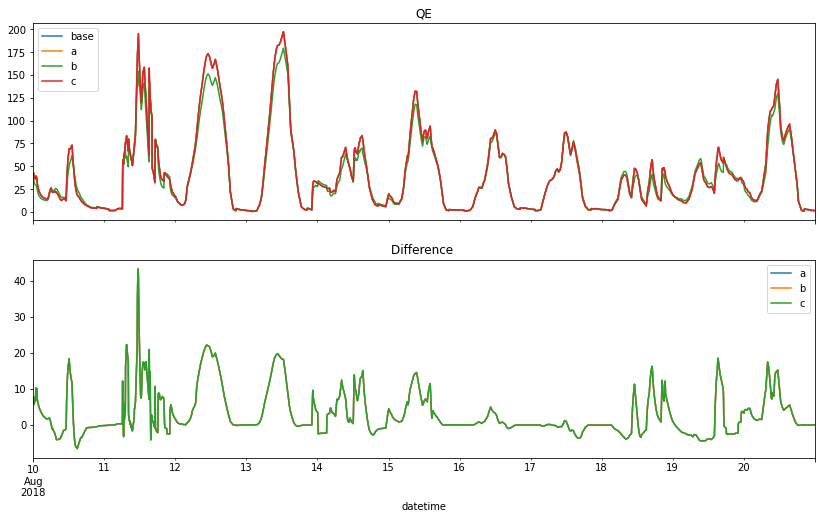

In [15]:
s = '2018 08 10'
e = '2018 08 20'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))

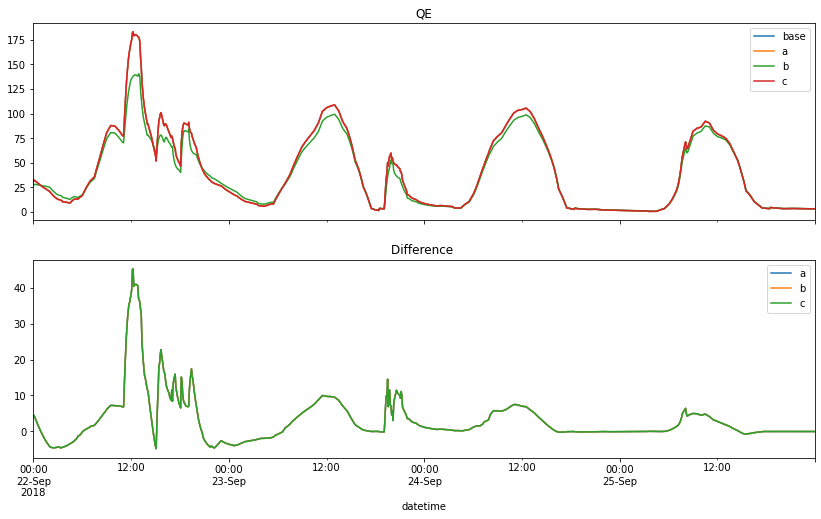

In [16]:
s = '2018 09 22'
e = '2018 09 25'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))

In [17]:
#df_output_suews_a = df_output_suews_a.SUEWS
#df_output_suews_a.loc['2018 07 01':'2018 07 30','QE'].plot()

In [18]:
def daily_water(scenario, s,e):
    ax_output = (
        scenario.loc[s:e].resample("1d").mean().loc[:, ["Rain", "Irr", "Evap", "RO", "TotCh"]]
    .plot(figsize=(14, 8), title="Surface Water Balance",)
)
    _ = ax_output.set_xlabel("Date")
    _ = ax_output.set_ylabel("Water amount (mm)")
    _ = ax_output.legend()


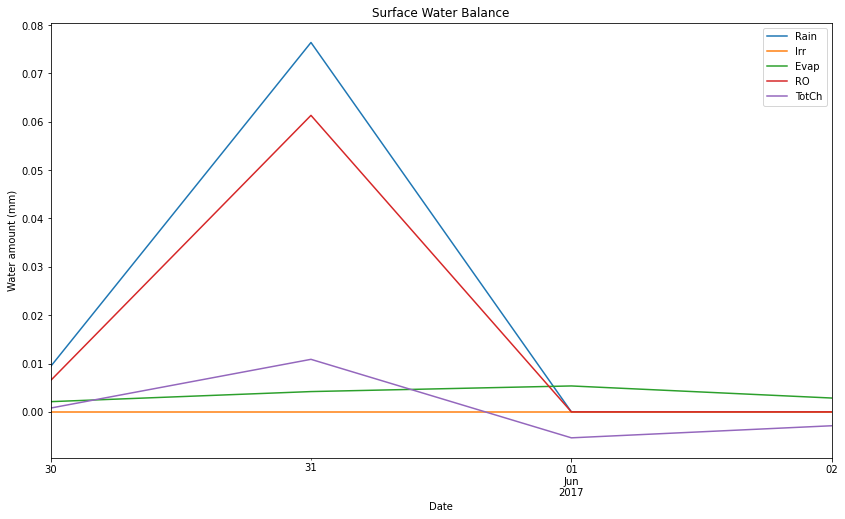

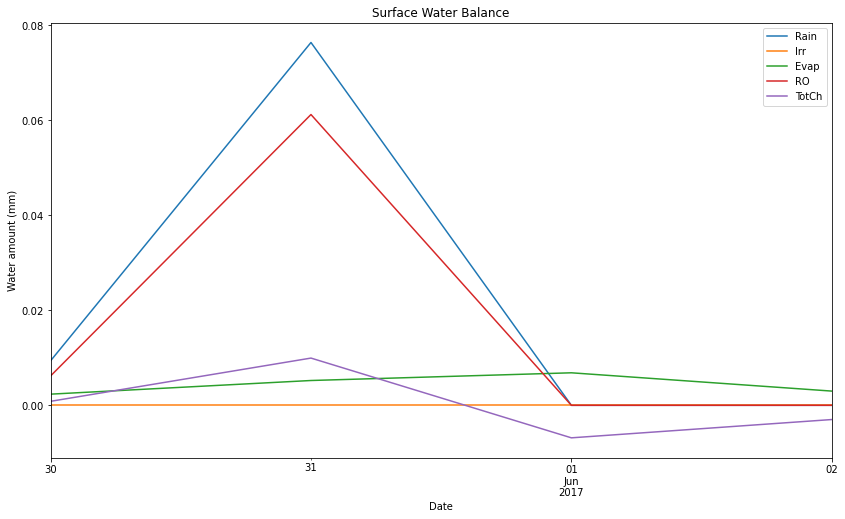

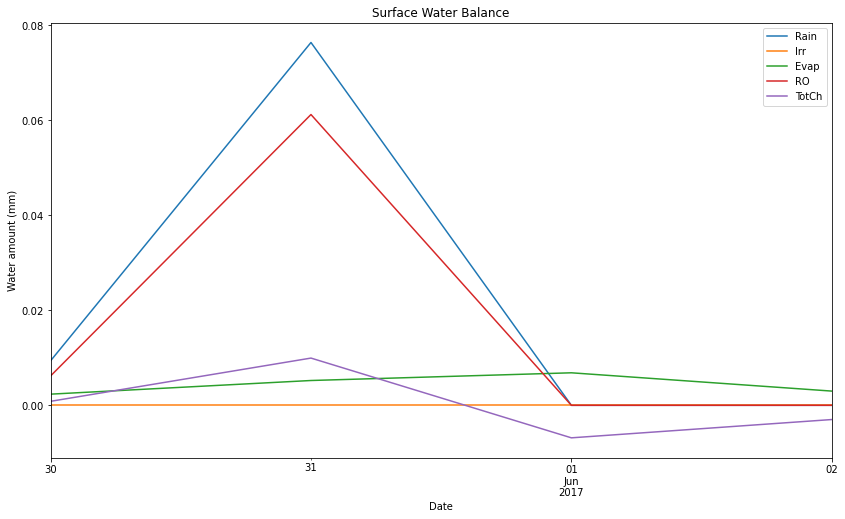

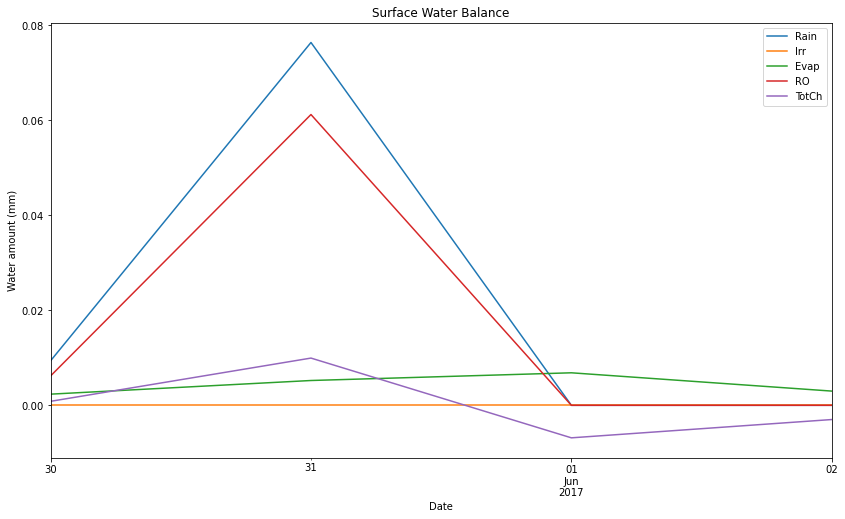

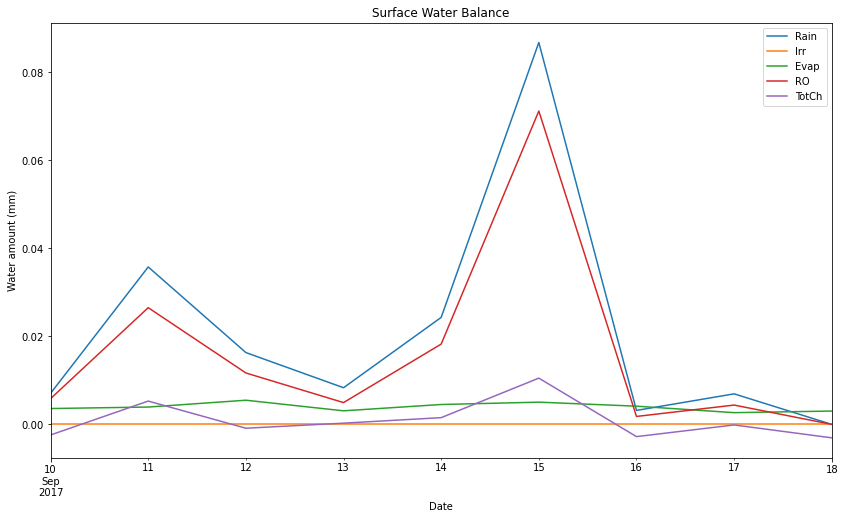

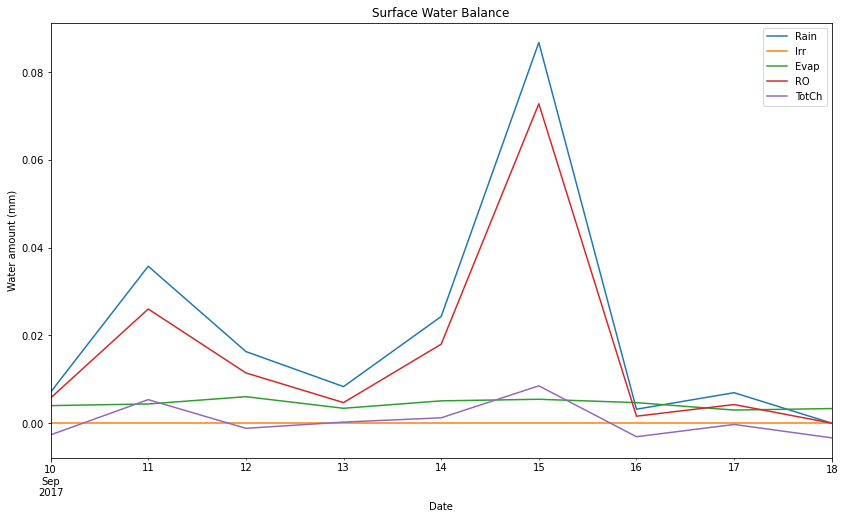

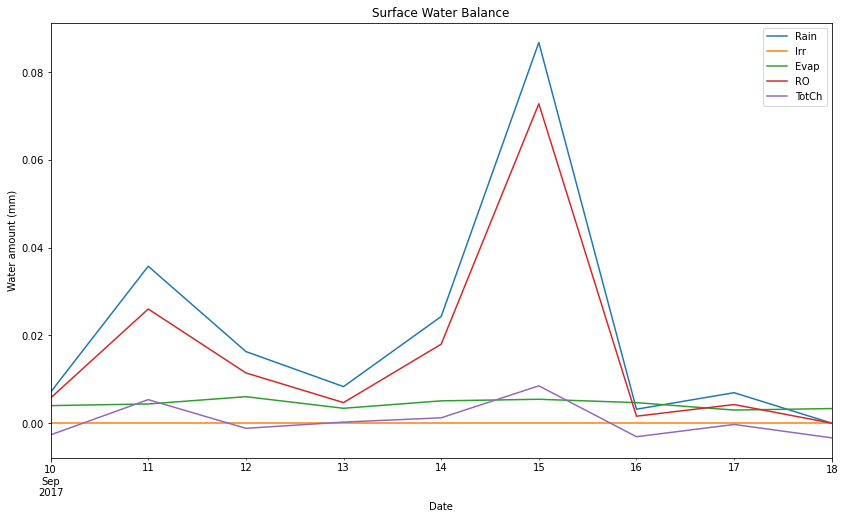

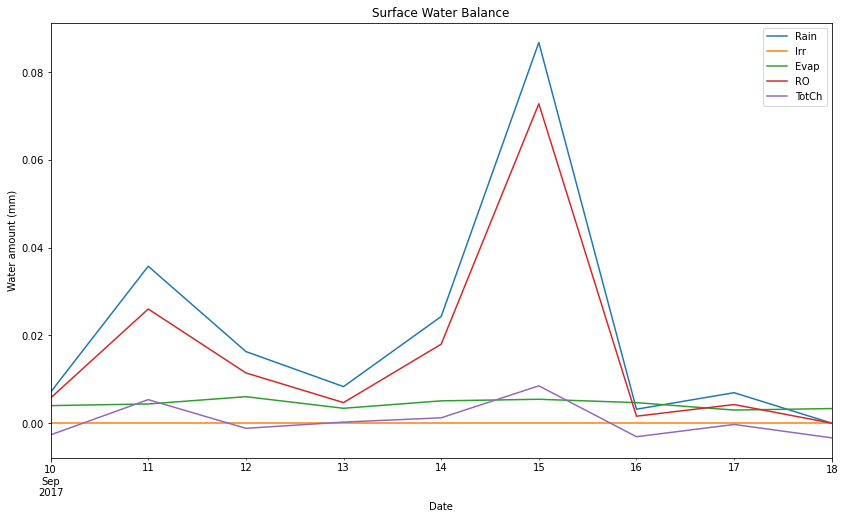

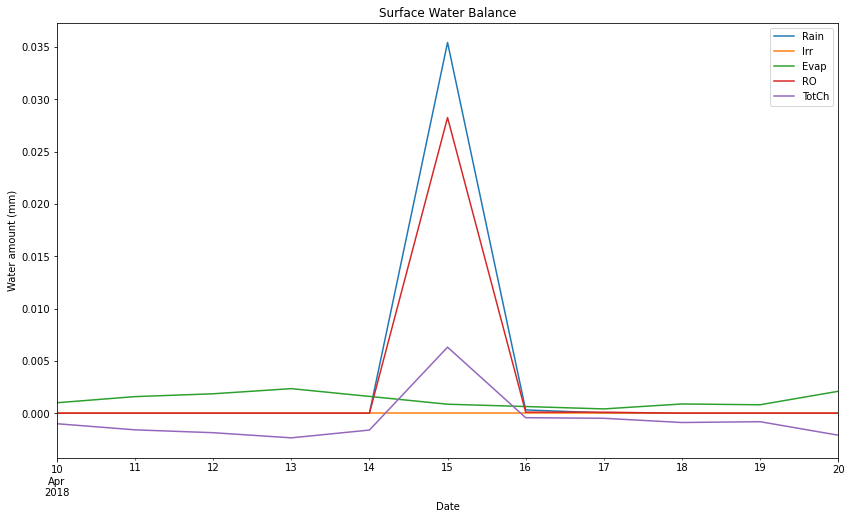

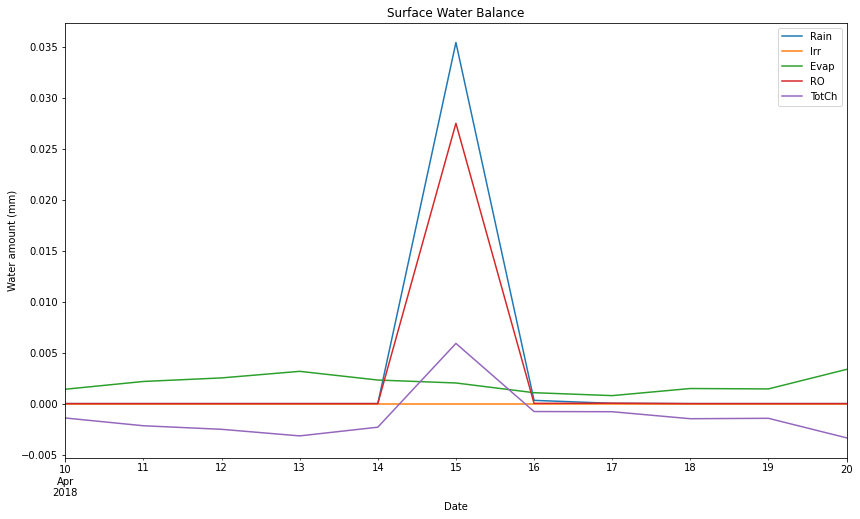

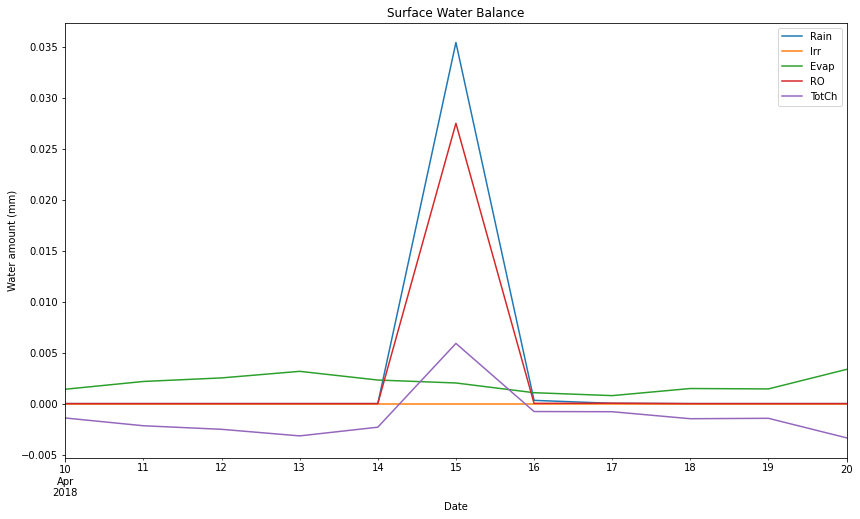

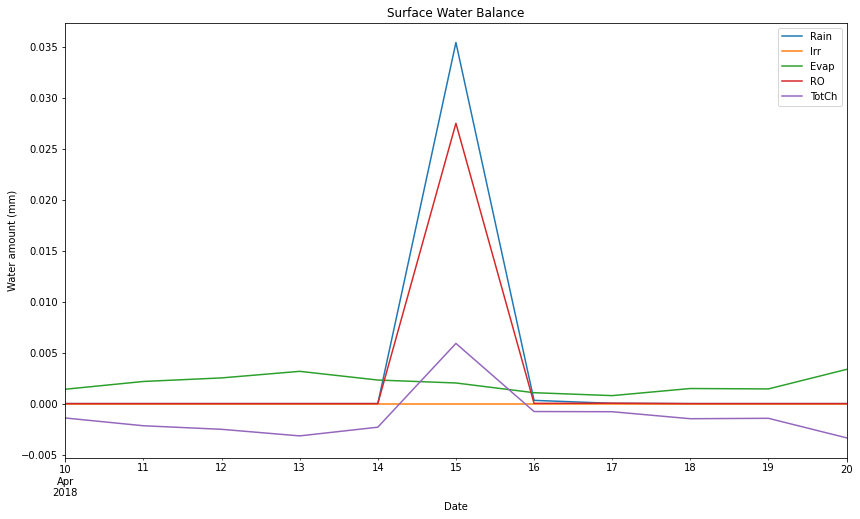

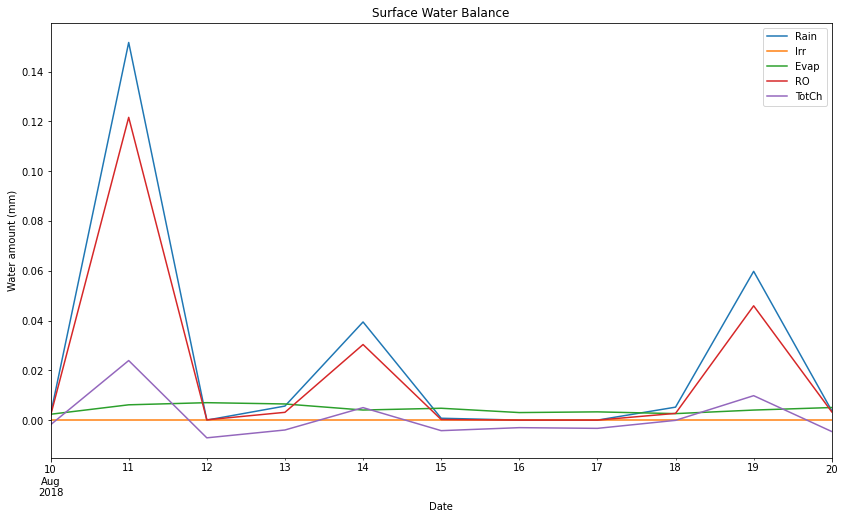

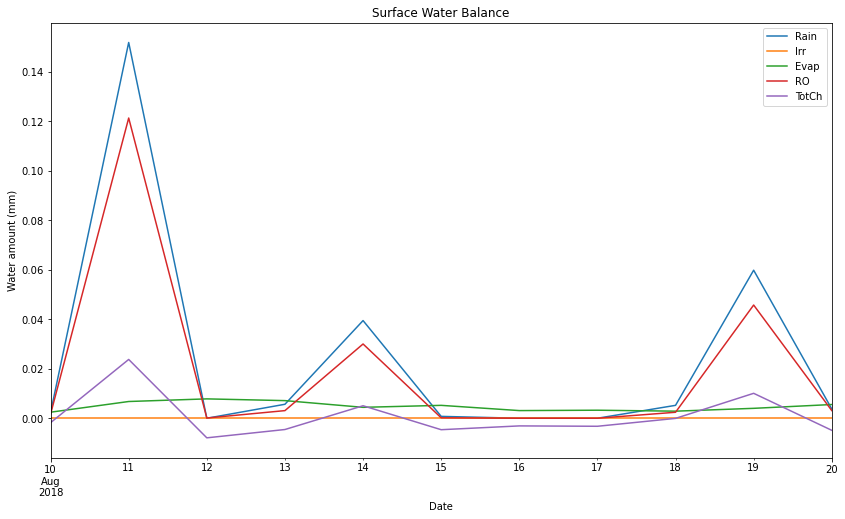

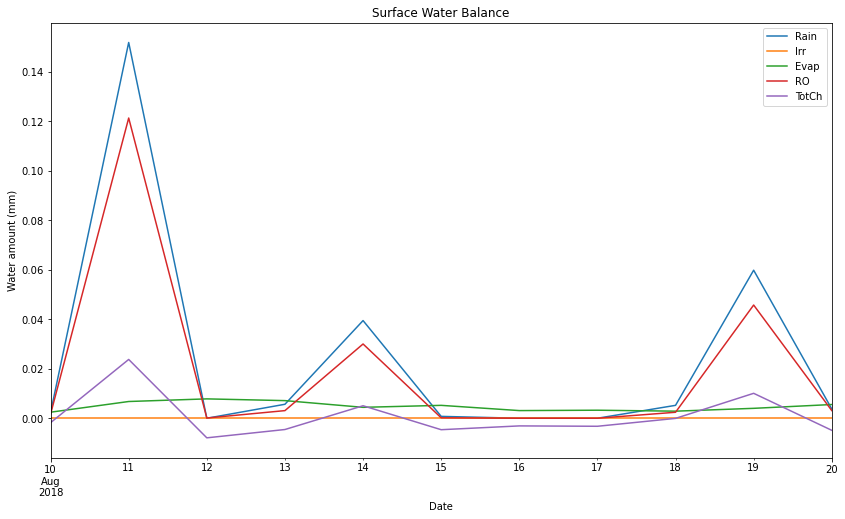

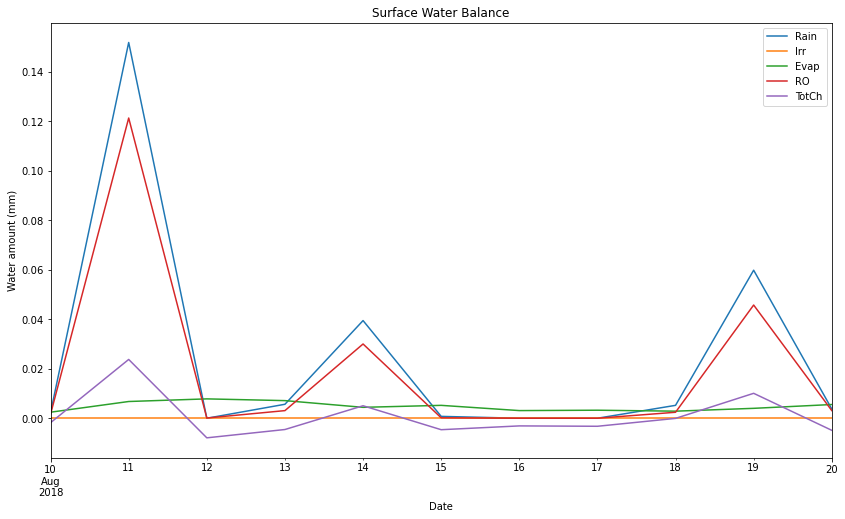

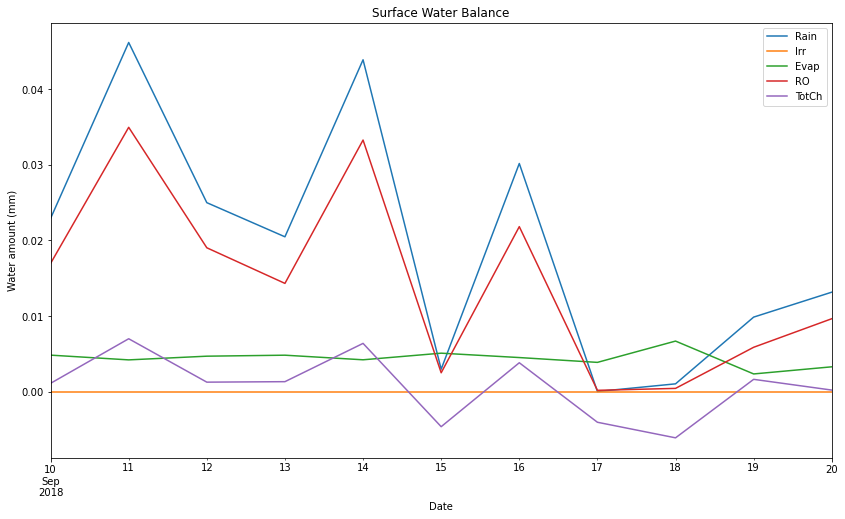

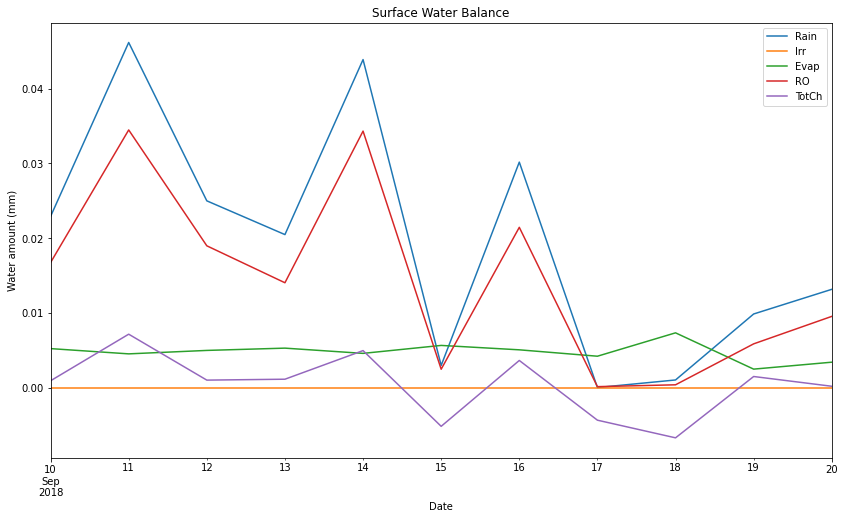

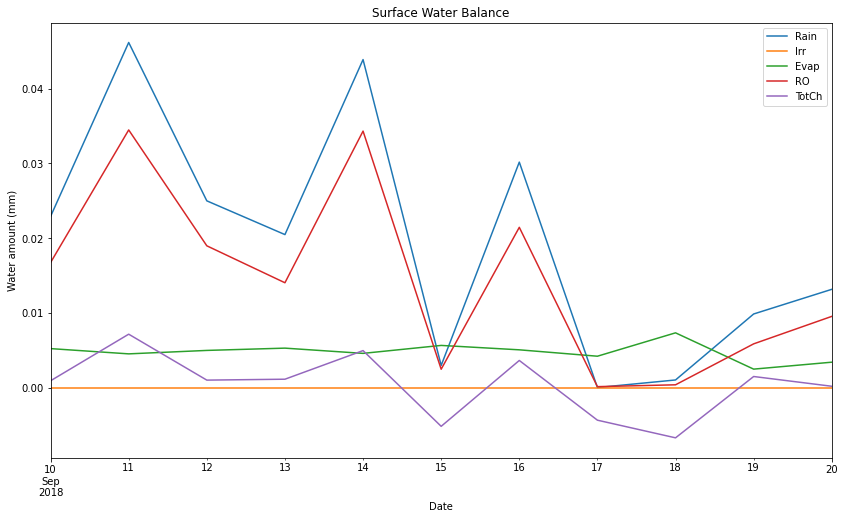

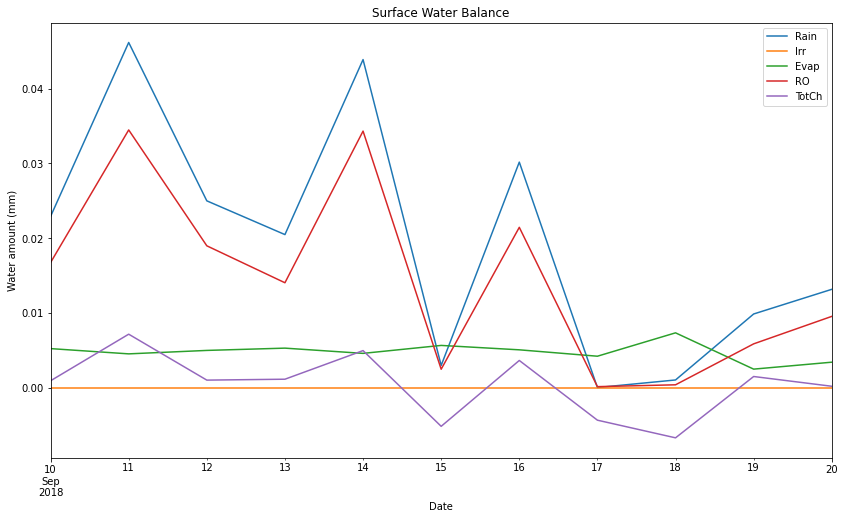

In [19]:
#olika scenarier och datum när det har regnat mycket
daily_water(df_output_base, '2017 05 30', '2017 06 02')
daily_water(df_output_a, '2017 05 30', '2017 06 02')
daily_water(df_output_b, '2017 05 30', '2017 06 02')
daily_water(df_output_c, '2017 05 30', '2017 06 02')

daily_water(df_output_base, '2017 09 10', '2017 09 18')
daily_water(df_output_a, '2017 09 10', '2017 09 18')
daily_water(df_output_b, '2017 09 10', '2017 09 18')
daily_water(df_output_c, '2017 09 10', '2017 09 18')

daily_water(df_output_base, '2018 04 10', '2018 04 20')
daily_water(df_output_a, '2018 04 10', '2018 04 20')
daily_water(df_output_b, '2018 04 10', '2018 04 20')
daily_water(df_output_c, '2018 04 10', '2018 04 20')

daily_water(df_output_base, '2018 08 10', '2018 08 20')
daily_water(df_output_a, '2018 08 10', '2018 08 20')
daily_water(df_output_b, '2018 08 10', '2018 08 20')
daily_water(df_output_c, '2018 08 10', '2018 08 20')

daily_water(df_output_base, '2018 09 10', '2018 09 20')
daily_water(df_output_a, '2018 09 10', '2018 09 20')
daily_water(df_output_b, '2018 09 10', '2018 09 20')
daily_water(df_output_c, '2018 09 10', '2018 09 20')